# Machine Learning Model Mockup

In [61]:
# Add Matplotlib inline magic command
%matplotlib inline

# Initial imports
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [83]:
# Machine learning imports
#from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [93]:
# Load the data
file_path = 'Resources/fatal-police-shootings-data.csv' 
killings_df = pd.read_csv(file_path, low_memory = False)                         
killings_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,6791,Doward Sylleen Baker,4/19/2021,shot and Tasered,gun,39.0,M,B,Dothan,AL,False,attack,Car,False,-85.379,31.214,True
6229,6790,Ma’Khia Bryant,4/20/2021,shot,knife,16.0,F,B,Columbus,OH,False,other,Not fleeing,True,-82.839,39.917,True
6230,6793,NaN,4/21/2021,shot,metal pole,NaN,M,NaN,Escondido,CA,True,other,Not fleeing,True,-117.078,33.106,True
6231,6794,Andrew Brown,4/21/2021,shot,undetermined,42.0,M,B,Elizabeth City,NC,False,undetermined,Car,True,-76.226,36.290,True


## Preprocessing Data

In [94]:
# Inspect column data types
killings_df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

### The following column data types will need to be changed:
- Column Name --> New Datatype
    - date --> date
    - manner_of_death --> category
    - armed --> category
    - gender --> category
    - race --> category
    - city --> category
    - state --> category
    - threat_level --> category
    - flee --> category

In [95]:
killings_df['date'] = pd.to_datetime(killings_df['date'], format = '%m/%d/%Y')
killings_df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
dtype: object

In [96]:
# Use for loop to convert object columns to category
for col in ['manner_of_death', 
            'armed', 
            'gender', 
            'race', 
            'city', 
            'state', 
            'threat_level', 
            'flee']:
    killings_df[col] = killings_df[col].astype('category')
    
killings_df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                  category
armed                            category
age                               float64
gender                           category
race                             category
city                             category
state                            category
signs_of_mental_illness              bool
threat_level                     category
flee                             category
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
dtype: object

In [97]:
# Find null values
for column in killings_df.columns:
    print(f'Column {column} has {killings_df[column].isnull().sum()} null values')

Column id has 0 null values
Column name has 232 null values
Column date has 0 null values
Column manner_of_death has 0 null values
Column armed has 208 null values
Column age has 278 null values
Column gender has 0 null values
Column race has 551 null values
Column city has 0 null values
Column state has 0 null values
Column signs_of_mental_illness has 0 null values
Column threat_level has 0 null values
Column flee has 377 null values
Column body_camera has 0 null values
Column longitude has 300 null values
Column latitude has 300 null values
Column is_geocoding_exact has 0 null values


In [98]:
# Replace empty/blank values
# Column: name
killings_df['name'].replace({None: 'Unavailable'}, inplace = True)

# Column: armed
killings_df['armed'].replace({None: 'undetermined'}, inplace = True)

# Column: age
killings_df['age'] = killings_df['age'].fillna(killings_df.groupby(['race', 'gender'])['age'].transform('mean'))

# Column: race
killings_df['race'].replace({None: 'U'}, inplace = True)

# Column: flee
killings_df['flee'].replace({None: 'U'}, inplace = True)

In [ ]:
# Add day of week based on date?

In [102]:
# Drop/delete is_geo_coding_exact column
#del killings_df['geo_coding_exact']
killings_df = killings_df.drop(killings_df.columns[[0, 1, 2, 14, 15, 16]], axis = 1)

In [103]:
# Check column data types
killings_df.dtypes

manner_of_death            category
armed                        object
age                         float64
gender                     category
race                         object
city                       category
state                      category
signs_of_mental_illness        bool
threat_level               category
flee                         object
body_camera                    bool
dtype: object

In [104]:
# Re-inspect for null values
for column in killings_df.columns:
    print(f'Column {column} has {killings_df[column].isnull().sum()} null values')

Column manner_of_death has 0 null values
Column armed has 0 null values
Column age has 173 null values
Column gender has 0 null values
Column race has 0 null values
Column city has 0 null values
Column state has 0 null values
Column signs_of_mental_illness has 0 null values
Column threat_level has 0 null values
Column flee has 0 null values
Column body_camera has 0 null values


In [ ]:
# Get missing latitudes and longitudes?

In [106]:
# Use get_dummies() to transform text values into numerical values
killings_encoded = pd.get_dummies(killings_df, columns = ['manner_of_death', 'armed', 'gender', 'race', 'city',
                                                         'state', 'signs_of_mental_illness', 'threat_level',
                                                         'flee', 'body_camera'])
killings_encoded.head()

,age,manner_of_death_shot,manner_of_death_shot and Tasered,armed_Airsoft pistol,armed_BB gun,armed_BB gun and vehicle,armed_Taser,armed_air conditioner,armed_air pistol,armed_ax,...,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,flee_U,body_camera_False,body_camera_True
0,53.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,47.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,23.0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,32.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,39.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


## Exploratory Data Analysis (EDA)

In [105]:
# Describe the data
killings_df.describe()

,age
count,6060.000000
mean,37.084889
std,12.903839
min,6.000000
25%,27.000000
50%,35.000000
75%,45.000000
max,91.000000


### Visually Inspect Data

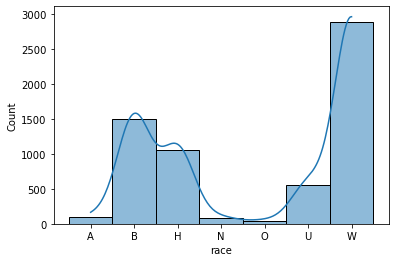

In [71]:
# Plot shootings by race 2015-2021
sns.histplot(killings_df.race, kde = True)
plt.show()

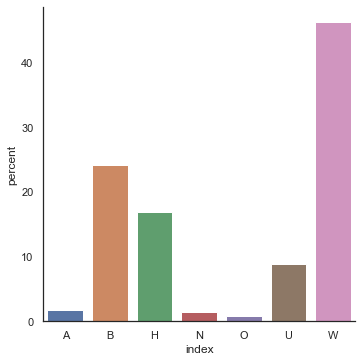

In [81]:
# Plot percentage of shootings by race 2015-2021
plot1 = killings_df.race.value_counts(normalize = True)

# Convert race counts to percents
plot1 = plot1 * 100
plot1 = plot1.rename('percent').reset_index()

sns.set_theme(style = 'white')
r = sns.catplot(x = 'index', y = 'percent', kind = 'bar', data = plot1)

plt.show()

In [107]:
# Maybe add some more graphs?